In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

### Introduction to Numpy

- Numpy is the core library for scientific computing in Python.<br/>
- It provides a high-performance multidimensional array object, and tools for working with these arrays.<br/>

- A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers.<br/> 
- The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.<br/>

- We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a))            # Prints "<type 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                 # Change an element of the array
print (a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])     # Create a rank 2 array
print (b.shape)                     # Prints "(2, 3)"
print (b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<type 'numpy.ndarray'>
(3L,)
1 2 3
[5 2 3]
(2L, 3L)
1 2 4


In [3]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


### If you curious about Numpy <a href ="http://cs231n.github.io/python-numpy-tutorial/">click here</a> to go a usefull source

## Coming Back to our topics

<strong>Given a list of values, there are several ways to count the frequency of each value.</strong>

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [6]:
t

[1, 2, 2, 3, 5]

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [10]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [11]:
hist[4]

0

The `Values` method returns the values:

In [12]:
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

So you can iterate the values and their frequencies like this:

In [13]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [14]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

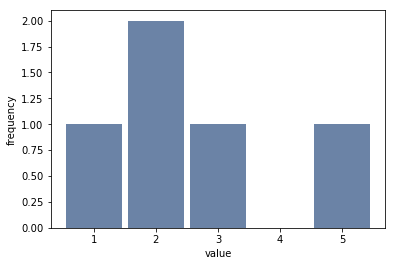

In [9]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

First, I'll load the data from the pregnancy file and select the records for live births.

In [10]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

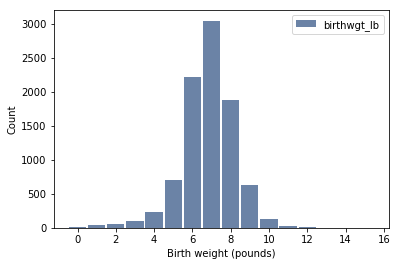

In [12]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
#print(hist) -- Freq of the data
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [16]:
ages = np.floor(live.agepreg) # sayıyı yuvarlamıs
ages

0        33.0
1        39.0
2        14.0
3        17.0
4        18.0
5        27.0
6        28.0
7        30.0
8        28.0
9        32.0
10       25.0
11       23.0
12       24.0
15       28.0
16       30.0
17       18.0
19       27.0
20       30.0
21       18.0
23       22.0
24       25.0
25       29.0
26       32.0
27       18.0
28       20.0
29       21.0
31       33.0
32       26.0
33       27.0
34       37.0
         ... 
13548    23.0
13551    25.0
13552    26.0
13553    27.0
13554    28.0
13555    17.0
13556    21.0
13557    26.0
13559    23.0
13560    26.0
13561    28.0
13562    18.0
13563    21.0
13564    23.0
13565    20.0
13566    32.0
13569    18.0
13570    24.0
13571    27.0
13572    33.0
13573    22.0
13574    24.0
13576    31.0
13578    24.0
13579    25.0
13581    30.0
13584    26.0
13588    17.0
13591    21.0
13592    21.0
Name: agepreg, dtype: float64

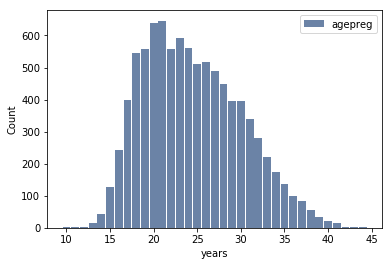

In [17]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
print(hist) #-- Frequency of data

Hist({10.0: 2, 11.0: 1, 12.0: 1, 13.0: 14, 14.0: 43, 15.0: 128, 16.0: 242, 17.0: 398, 18.0: 546, 19.0: 559, 20.0: 638, 21.0: 646, 22.0: 557, 23.0: 593, 24.0: 561, 25.0: 512, 26.0: 517, 27.0: 489, 28.0: 449, 29.0: 395, 30.0: 396, 31.0: 339, 32.0: 279, 33.0: 220, 34.0: 175, 35.0: 138, 36.0: 99, 37.0: 83, 38.0: 55, 39.0: 34, 40.0: 21, 41.0: 14, 42.0: 2, 43.0: 1, 44.0: 1})


In [20]:
for weeks, freq in hist.Smallest(10): # .Smallest -- function inside the thinkplot module
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


From live births, we can selection first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [22]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

In [25]:
print(first_hist)
print(other_hist)

Hist({0: 1, 17: 1, 20: 1, 21: 1, 22: 3, 23: 1, 24: 7, 25: 1, 26: 16, 27: 1, 28: 24, 29: 9, 30: 73, 31: 15, 32: 55, 33: 28, 34: 29, 35: 159, 36: 172, 37: 208, 38: 272, 39: 2114, 40: 536, 41: 360, 42: 205, 43: 87, 44: 23, 45: 6, 46: 1, 47: 1, 48: 3})
Hist({4: 1, 9: 1, 13: 1, 17: 1, 18: 1, 19: 1, 21: 1, 22: 4, 24: 6, 25: 2, 26: 19, 27: 2, 28: 8, 29: 12, 30: 65, 31: 12, 32: 60, 33: 21, 34: 31, 35: 152, 36: 149, 37: 247, 38: 335, 39: 2579, 40: 580, 41: 227, 42: 123, 43: 61, 44: 23, 45: 4, 48: 4, 50: 2})


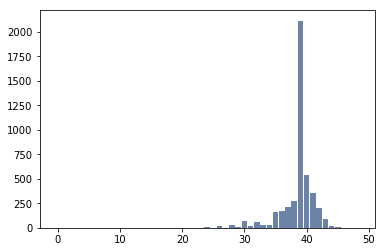

In [26]:
thinkplot.Hist(first_hist)

We can use `width` and `align` to plot two histograms side-by-side.

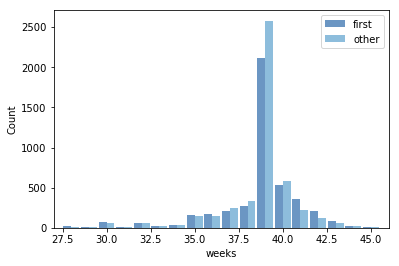

In [27]:
width = 0.45 # width of the columns
thinkplot.PrePlot(2) # 2 tane column olucak
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46]) # x axisi bu aralıkta göstermesini sağlıyor

`Series` provides methods to compute summary statistics:

In [29]:
mean = live.prglngth.mean() # average
var = live.prglngth.var() # varience
std = live.prglngth.std() # standart deviation

2.702343810070593

Here are the mean and standard deviation:

In [24]:
mean, std

(38.56055968517709, 2.702343810070593)

Here's are the mean pregnancy lengths for first babies and others:

In [30]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [27]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d